#1 Загрузка и обзор датасета


In [ ]:
import pandas as pd
import json
import gdown

# Ссылка на файл
url = 'https://drive.google.com/uc?id=1GPgjRHxPJT0_HsnBuqSpM1C4QQmKc-jl'

# Загрузка файла
gdown.download(url, 'coffee_shop_hard.csv', quiet=True)

# Загрузка датасета
dt = pd.read_csv('coffee_shop_hard.csv')

dt.info()
dt.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24909 entries, 0 to 24908
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  24909 non-null  int64  
 1   quantity        24909 non-null  int64  
 2   unit_price      24909 non-null  float64
 3   product_info    24909 non-null  object 
 4   store_info      24909 non-null  object 
 5   customer_info   24909 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


,transaction_id,quantity,unit_price,product_info,store_info,customer_info
0,0,1,162.50,"{""product_id"":52,""product_name"":""Traditional B...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":558,""birthdate"":""1983-02-25"",""g..."
1,1,2,227.50,"{""product_id"":27,""product_name"":""Brazilian Lg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":781,""birthdate"":""1991-07-29"",""g..."
2,2,2,162.50,"{""product_id"":46,""product_name"":""Serenity Gree...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":788,""birthdate"":""1995-02-23"",""g..."
3,3,2,162.50,"{""product_id"":23,""product_name"":""Our Old Time ...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":683,""birthdate"":""1999-02-06"",""g..."
4,4,1,159.25,"{""product_id"":34,""product_name"":""Jamaican Coff...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":99,""birthdate"":""1967-01-29"",""ge..."
5,5,1,195.00,"{""product_id"":32,""product_name"":""Ethiopia Rg"",...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":664,""birthdate"":""1996-09-04"",""g..."
6,6,2,195.00,"{""product_id"":49,""product_name"":""English Break...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":316,""birthdate"":""1952-04-11"",""g..."
7,7,1,243.75,"{""product_id"":60,""product_name"":""Sustainably G...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":38,""birthdate"":""1956-09-13"",""ge..."
8,8,2,195.00,"{""product_id"":51,""product_name"":""Earl Grey Lg""...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":370,""birthdate"":""1959-03-03"",""g..."
9,9,2,195.00,"{""product_id"":49,""product_name"":""English Break...","{""sales_outlet_id"":3,""store_city"":""Санкт-Петер...","{""customer_id"":180,""birthdate"":""1980-11-09"",""g..."


# 1.2 Предобработка данных


**Подготовка данных:**


In [ ]:

# Извлечение данных из столбцов JSON
dt['product_info'] = dt['product_info'].apply(json.loads)
dt['store_info'] = dt['store_info'].apply(json.loads)
dt['customer_info'] = dt['customer_info'].apply(json.loads)

# Нормализация столбцов JSON
product_info_df = pd.json_normalize(dt['product_info'])
store_info_df = pd.json_normalize(dt['store_info'])
customer_info_df = pd.json_normalize(dt['customer_info'])

# Объединение нормализованных датасетов обратно в исходный датасет
dt = pd.concat([dt.drop(columns=['product_info', 'store_info', 'customer_info']),
                  product_info_df, store_info_df, customer_info_df], axis=1)

# Преобразование даты рождения в datetime и расчет возраста
dt['birthdate'] = pd.to_datetime(dt['birthdate'])
dt['age'] = (pd.to_datetime('today') - dt['birthdate']).dt.days // 365

# Извлечение года из даты рождения для анализа распределения по возрасту
dt['birth_year'] = dt['birthdate'].dt.year


В процессе предобработки данных были извлечены данные из столбцов с форматом JSON, проведена нормализация столбцов JSON, объединение в один датасет, преобразование даты рождения и расчет возраста клиента, извлечение даты рождения. Результат  предобработки датасета ниже:

In [ ]:
dt.head(10)

,transaction_id,quantity,unit_price,product_id,product_name,product_category,sales_outlet_id,store_city,customer_id,birthdate,gender,age,birth_year
0,0,1,162.50,52,Traditional Blend Chai Rg,Tea,3,Санкт-Петербург,558,1983-02-25,женский,41,1983
1,1,2,227.50,27,Brazilian Lg,Coffee,3,Санкт-Петербург,781,1991-07-29,не указан,33,1991
2,2,2,162.50,46,Serenity Green Tea Rg,Tea,3,Санкт-Петербург,788,1995-02-23,не указан,29,1995
3,3,2,162.50,23,Our Old Time Diner Blend Rg,Coffee,3,Санкт-Петербург,683,1999-02-06,женский,25,1999
4,4,1,159.25,34,Jamaican Coffee River Sm,Coffee,3,Санкт-Петербург,99,1967-01-29,мужской,57,1967
5,5,1,195.00,32,Ethiopia Rg,Coffee,3,Санкт-Петербург,664,1996-09-04,женский,28,1996
6,6,2,195.00,49,English Breakfast Lg,Tea,3,Санкт-Петербург,316,1952-04-11,женский,72,1952
7,7,1,243.75,60,Sustainably Grown Organic Rg,Drinking Chocolate,3,Санкт-Петербург,38,1956-09-13,мужской,68,1956
8,8,2,195.00,51,Earl Grey Lg,Tea,3,Санкт-Петербург,370,1959-03-03,женский,65,1959
9,9,2,195.00,49,English Breakfast Lg,Tea,3,Санкт-Петербург,180,1980-11-09,мужской,43,1980


# 2. Разведочных и статистический анализ данных


# 2.1 Структура данных

In [ ]:
#Обзор структуры данных в датасете.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24909 entries, 0 to 24908
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    24909 non-null  int64         
 1   quantity          24909 non-null  int64         
 2   unit_price        24909 non-null  float64       
 3   product_id        24909 non-null  int64         
 4   product_name      24909 non-null  object        
 5   product_category  24909 non-null  object        
 6   sales_outlet_id   24909 non-null  int64         
 7   store_city        24909 non-null  object        
 8   customer_id       24909 non-null  int64         
 9   birthdate         24909 non-null  datetime64[ns]
 10  gender            24909 non-null  object        
 11  age               24909 non-null  int64         
 12  birth_year        24909 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(4)
memory usage

Датасет состоит из 24909 наблюдений и 14 признаков(13 изначальных и 14 признак total добавляется в процессе работы с датасетом).


*   К количественным непрерывным относятся признаки: total, unit_price, quantity.
*   К количественным дискретным: birth_year, age.
*   К категориальным:product_name, product_category, store_city, gender


# 2.2 Одномерный анализ

# 2.2.1 Анализ количественных признаков

In [ ]:
new_dt = dt[['quantity','unit_price','birthdate','age','birth_year','total']].copy()
new_dt.describe()

KeyError: "['total'] not in index"

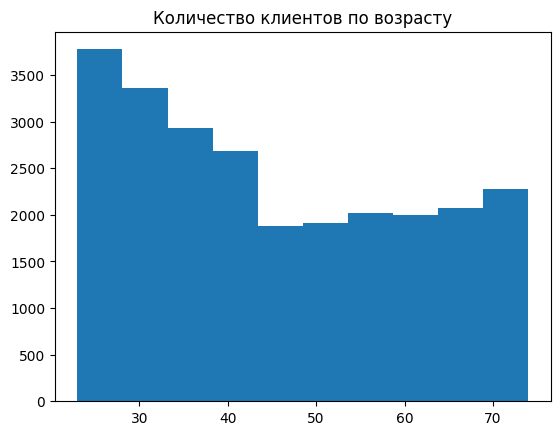

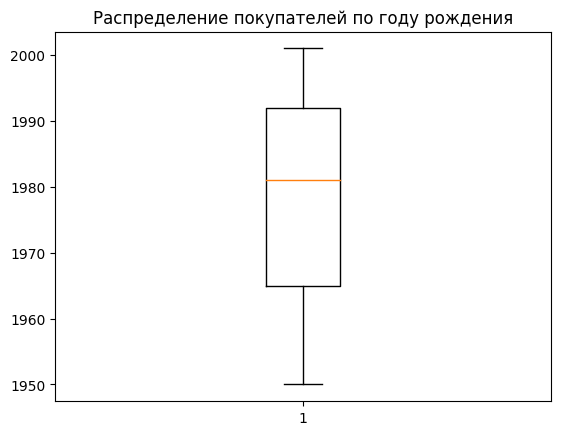

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dt['age'], bins=10)
plt.title('Количество клиентов по возрасту')
plt.show()

plt.boxplot(dt['birth_year'])
plt.title('Распределение покупателей по году рождения')
plt.show()


**Вывод:** Средний чек по сети - 299.62 рубля, при среднем количестве покупаемых позиций -1,43 по средней цене 215.33 рублей за позицию. Средний возраст покупателей 45 лет, при этом самые многочисленные группы покупателей до 42-х лет.

# 2.2.2 Анализ категориальных факторов

In [ ]:
dt['store_city'].describe()

,store_city
count,24909
unique,3
top,Санкт-Петербург
freq,8613


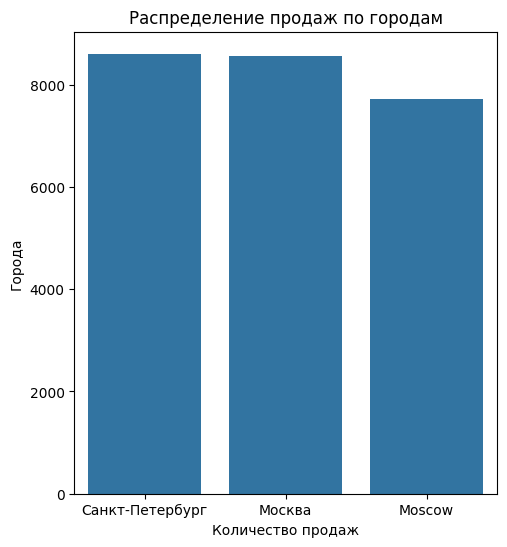

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
sns.countplot(x='store_city', data=dt)
plt.title('Распределение продаж по городам')
plt.xlabel('Количество продаж')
plt.ylabel('Города')
plt.show()

In [ ]:
dt['product_category'].describe()


,product_category
count,24909
unique,9
top,Coffee
freq,9970


In [ ]:
dt['product_category'].value_counts()

,count
product_category,
Coffee,9970
Tea,7889
Bakery,3786
Drinking Chocolate,1959
Flavours,783
Coffee beans,218
Loose Tea,155
Branded,82
Packaged Chocolate,67


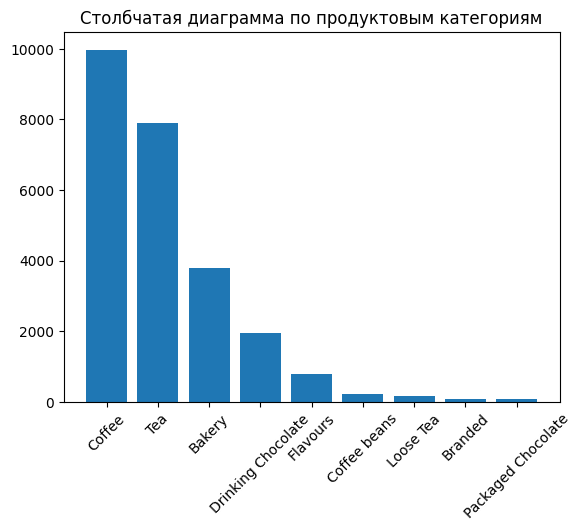

In [ ]:
prod_index=dt['product_category'].value_counts()

plt.bar(prod_index.index, prod_index.values)
plt.title('Столбчатая диаграмма по продуктовым категориям')
plt.xticks(rotation=45)
plt.show()

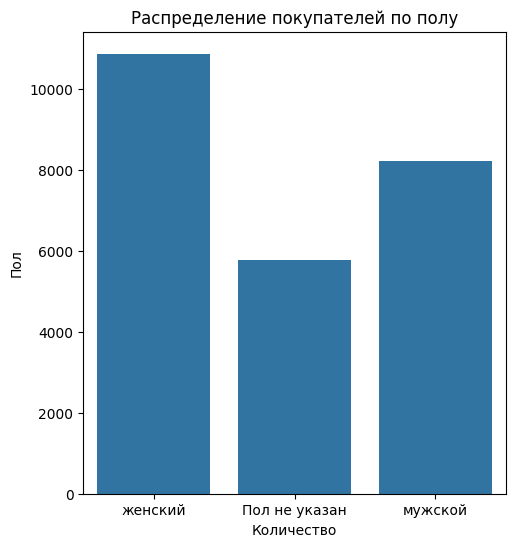

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=dt)
plt.title('Распределение покупателей по полу')
plt.xlabel('Количество')
plt.ylabel('Пол')
plt.show()

In [ ]:
dt['product_name'].describe()

,product_name
count,24909
unique,80
top,Morning Sunrise Chai Rg
freq,522


**Вывод:** Количество продаж в г. Москве в два раза больше, 9 уникальных продуктовых категорий, самая популярная "Кофе" с частотой 9970 из 24909 наблюдений.  Большая часть покупателей женского пола. Ассортимент продукции состоит из 80 наименований, самый покупаемый продукт Morning Sunrise Chai Rg - куплен 522 раза.

# 2.3 Анализ взаимосвязи количественных и категориальных факторов

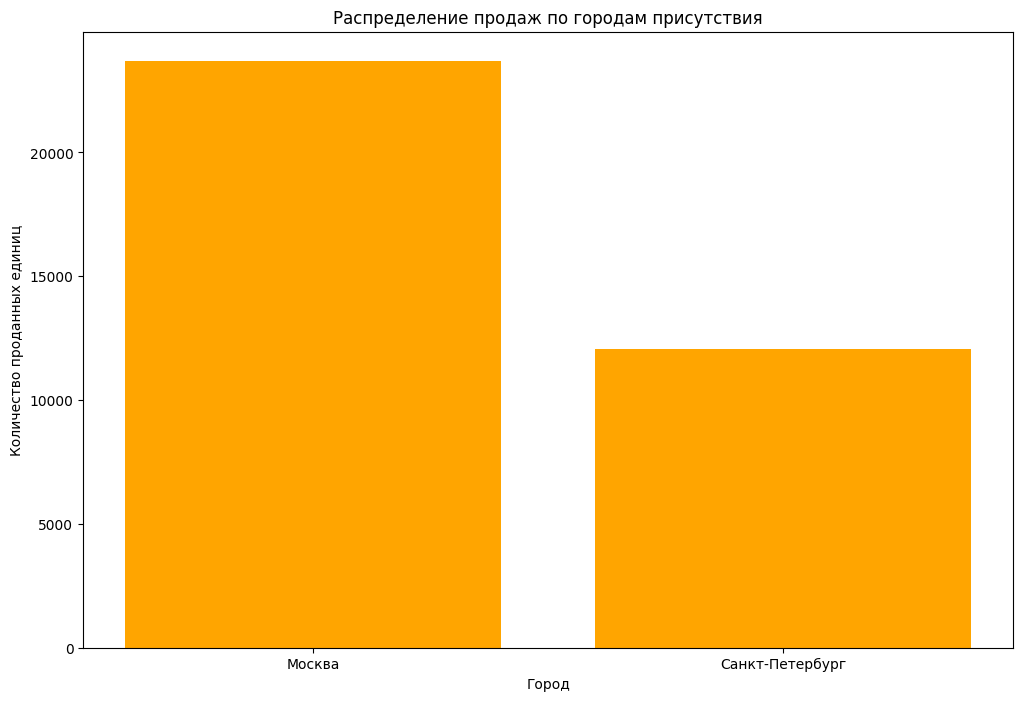

In [ ]:
# Приведение названий городов к единому формату
dt['store_city'] = dt['store_city'].replace('Moscow', 'Москва')

# Пересчет распределения продаж по городам
sales_distribution = dt.groupby('store_city')['quantity'].sum().reset_index()
sales_distribution.columns = ['Город', 'Общее количество проданных единиц']

# Построение графика распределения продаж
plt.figure(figsize=(12, 8))
plt.bar(sales_distribution['Город'], sales_distribution['Общее количество проданных единиц'], color='orange')
plt.title('Распределение продаж по городам присутствия')
plt.xlabel('Город')
plt.ylabel('Количество проданных единиц')
plt.xticks(rotation=0)
plt.show()

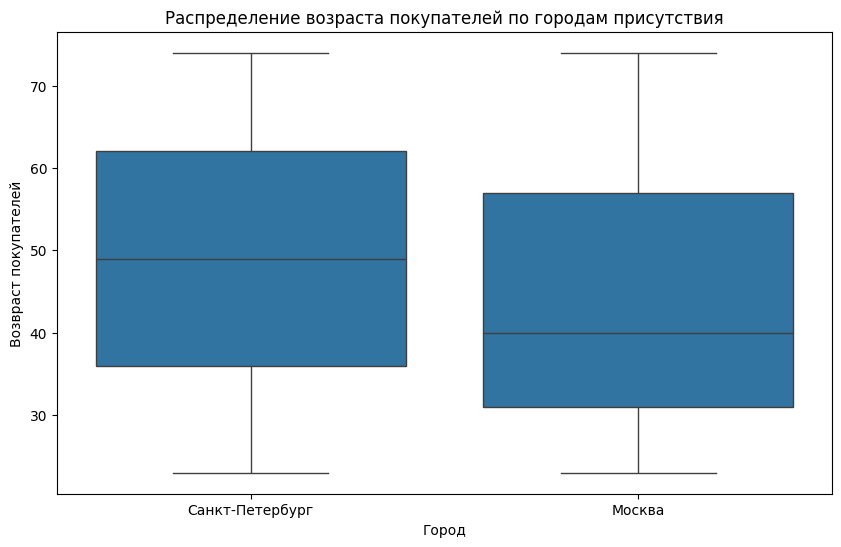

In [ ]:
# Построение графика возврата покупателей по городам.
plt.figure(figsize=(10,6))
sns.boxplot(x='store_city', y='age', data=dt)
plt.title('Распределение возраста покупателей по городам присутствия')
plt.xlabel('Город')
plt.ylabel('Возвраст покупателей')
plt.show()

**Анализ продаж по категориям продукции:**

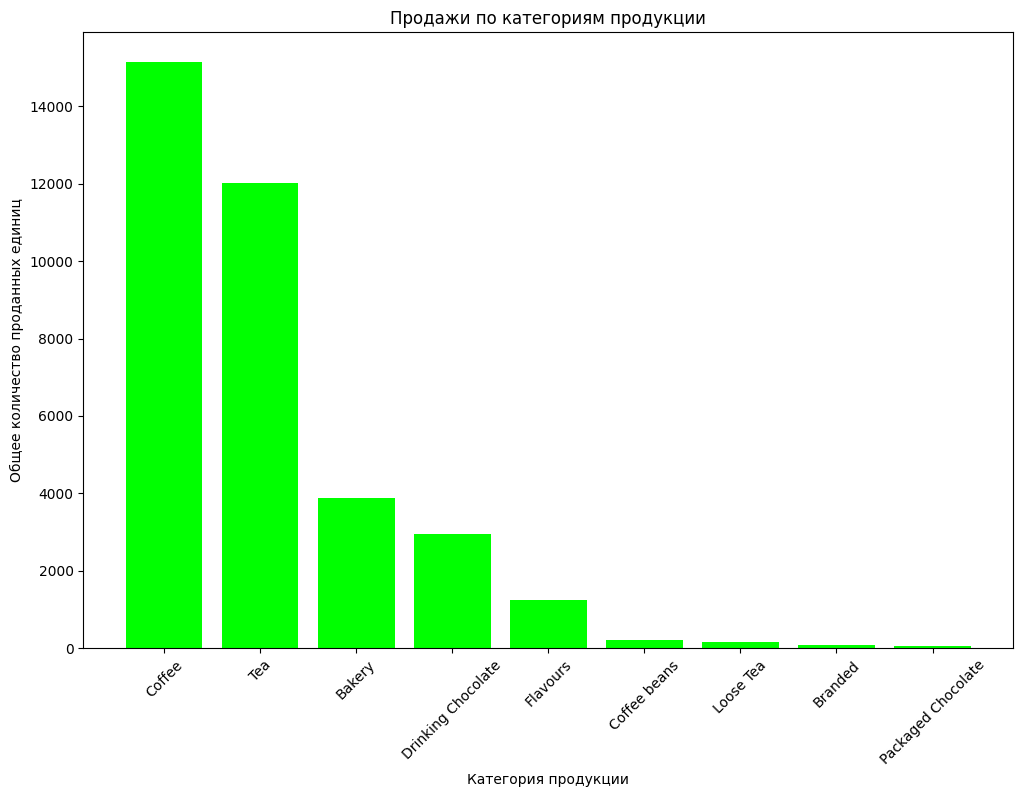

In [ ]:
# Анализ продаж по категориям
sales_by_category = dt.groupby('product_category')['quantity'].sum().reset_index()
sales_by_category.columns = ['Категория продукции', 'Общее количество проданных единиц']
sales_by_category = sales_by_category.sort_values(by='Общее количество проданных единиц', ascending=False)

# Построение графика продаж
plt.figure(figsize=(12, 8))
plt.bar(sales_by_category['Категория продукции'], sales_by_category['Общее количество проданных единиц'], color='lime')
plt.title('Продажи по категориям продукции')
plt.xlabel('Категория продукции')
plt.ylabel('Общее количество проданных единиц')
plt.xticks(rotation=45)
plt.show()

**Анализ демографических данных клиентов:**

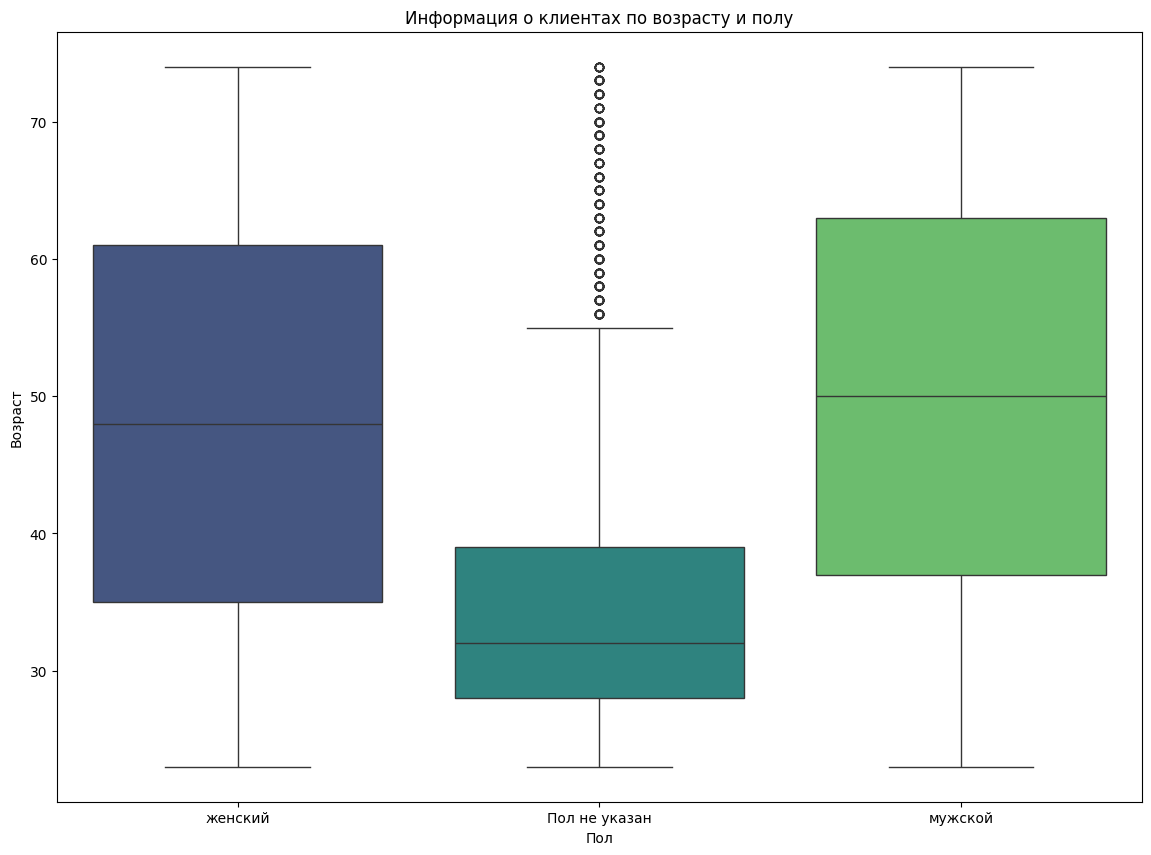

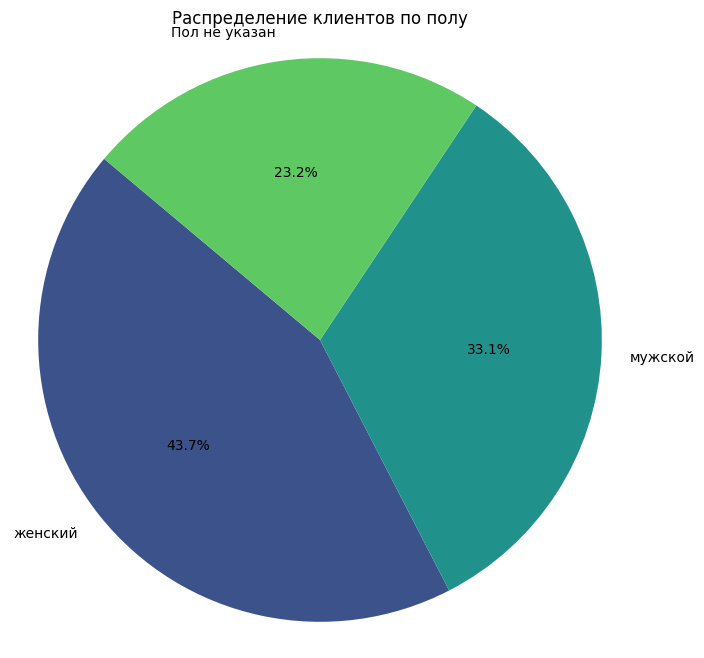

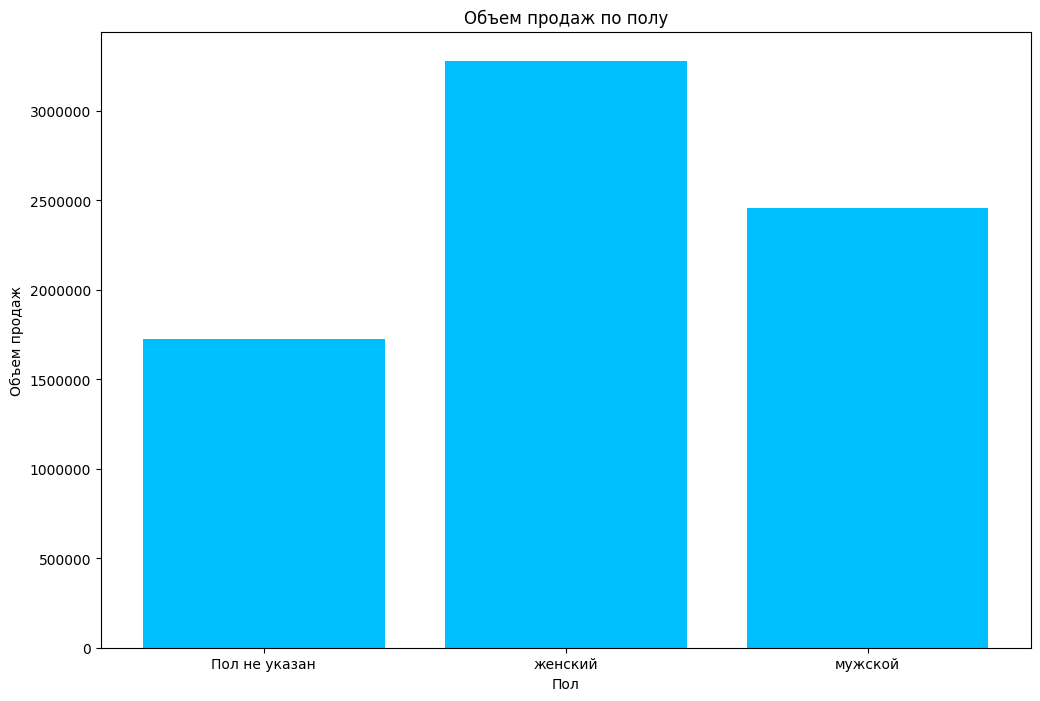

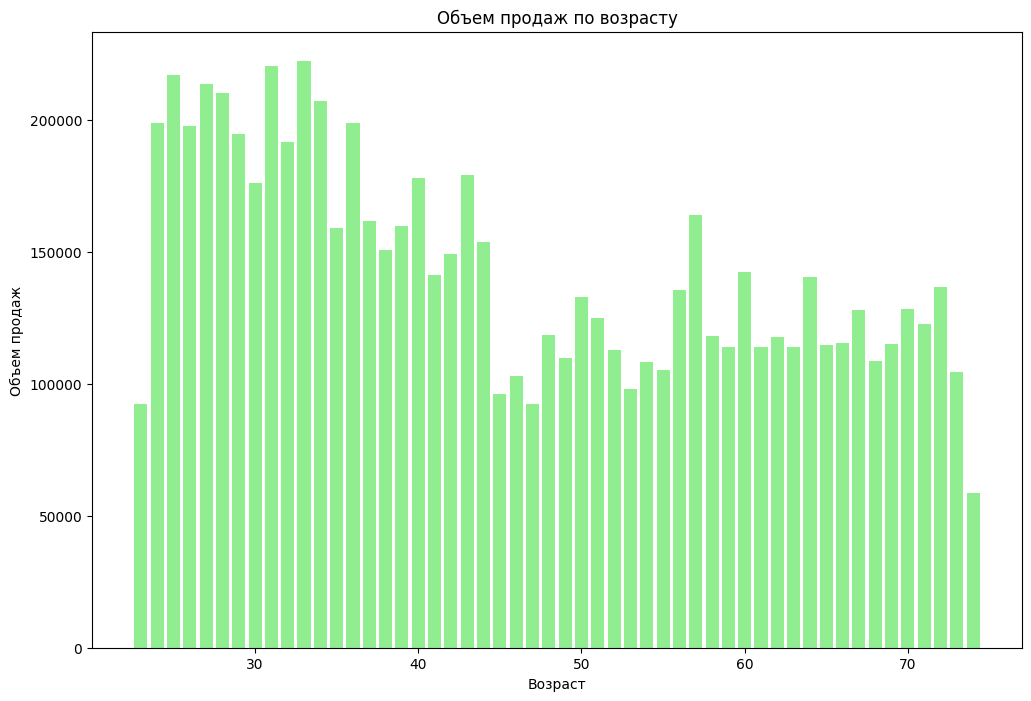

In [ ]:
import seaborn as sns

# Преобразовал значение "не указан" в "Пол не указан" для удобства
dt['gender'] = dt['gender'].replace('не указан', 'Пол не указан')

# Анализ демографии клиентов
plt.figure(figsize=(14, 10))
sns.boxplot(data=dt, x='gender', y='age', palette='viridis', hue='gender', legend=False)
plt.title('Информация о клиентах по возрасту и полу')
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.legend([],[], frameon=False)
plt.show()

# Процентное распределение по полу
gender_distribution = dt['gender'].value_counts(normalize=True) * 100

# Визуализация процентного распределения по полу
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(gender_distribution)))
plt.title('Распределение клиентов по полу')
plt.axis('equal')
plt.show()

# Проверка и пересчет общей суммы чека, если столбец отсутствует
if 'total' not in dt.columns:
    dt['total'] = dt['quantity'] * dt['unit_price']

# Анализ объемов продаж по полу и возрасту
sales_by_gender = dt.groupby('gender')['total'].sum().reset_index()
sales_by_age = dt.groupby('age')['total'].sum().reset_index()

# Визуализация объемов продаж по полу
plt.figure(figsize=(12, 8))
plt.bar(sales_by_gender['gender'], sales_by_gender['total'], color='deepskyblue')
plt.title('Объем продаж по полу')
plt.xlabel('Пол')
plt.ylabel('Объем продаж')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

# Визуализация объемов продаж по возрасту
plt.figure(figsize=(12, 8))
plt.bar(sales_by_age['age'], sales_by_age['total'], color='lightgreen')
plt.title('Объем продаж по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Объем продаж')
plt.show()

**Вывод:**Наибольшее значение продаж в г. Москве, так как там две точки продаж.
Анализ продаж по категориям продукции показывает, что кофе является наиболее продаваемым товаром, затем идёт чай и выпечка.
Общая доля покупок женщины 43.7%, мужчины 33.1% Процентное распределение клиентов по полу показывает, что большинство клиентов - это женщины, за которыми следуют мужчины. Боксплоты по возрасту в разрезе пола показывают, что межквартильный размах для женщин охватывает возраст от 35 до 61 лет, а для мужчин - от 37 до 63 лет. Медианный возраст для женщин составляет 48 лет, для мужчин - 50 лет.
Женщины совершают наибольший объем покупок. Так можно заметить, что клиенты в возрасте с 25 до 45 лет совершают большую часть покупок.

In [ ]:
# Проверим статистически занчимую разницу в разных возрастных группах.
from scipy import stats

# Проверка нормальности распределения данных с помощью теста Колмогорова-Смирнова( колличество наблюдений больше 5000 поэтому не можем использовать тест Шапиро- Уилка)
ks_test_age = stats.kstest(dt['age'], 'norm')
ks_test_total = stats.kstest(dt['total'], 'norm')

print('Kolmogorov-Smirnov test for age:', ks_test_age)
print('Kolmogorov-Smirnov test for total:', ks_test_total)

# Разбиваем на две группы
young = dt[dt['age'] < 30]['total']
adult = dt[dt['age'] >= 30]['total']


# Используем тест Манна-Уитни так, как наши данные не номрально распределены( p-value теста Колмогорова-Смирнова больше порога значимости 0.05 - можем отклонить гипотезу о нормальном распределение даных )
u_stat, p_value = stats.mannwhitneyu(young, adult)
print('U-statistic:', u_stat)
print('p-value:', p_value)


Kolmogorov-Smirnov test for age: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=23, statistic_sign=-1)
Kolmogorov-Smirnov test for total: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=52.0, statistic_sign=-1)
U-statistic: 45464615.5
p-value: 0.6171223885474175


**Вывод :** Так как значение p-value >0.05  можем сказать, что статистическая связь между возрастными группами и продажама не значима.

# 2.4 Анализ взаимосвязи категориальных признаков

In [ ]:
# Сформируем сводную таблицу по полу и категории продуктов
WD=pd.crosstab(dt['gender'],dt['product_category']); WD

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
gender,,,,,,,,,
Пол не указан,921,21,2277,42,426,215,41,17,1830
женский,1618,38,4351,97,887,335,66,28,3462
мужской,1247,23,3342,79,646,233,48,22,2597


**Формулируем гипотезу Н0:** статистически значимая связь между категориальными факторами Пол Клиента и Категория Продукта отсуствует.

In [ ]:
import numpy
import scipy
chi2, prob, f, expected= scipy.stats.chi2_contingency(WD)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print (output.format( chi2, f, prob))

test Statistics: 20.182573532273466
degrees of freedom: 16
p-value: 0.21210996233833543



**Вывод:** Так как полученное значение p-value > 0.05(уровня значимости) - гипотеза H0 принимается, т.е. статистически значимой взимосвязи в приобретаемых продуктах от пола клиента нет.


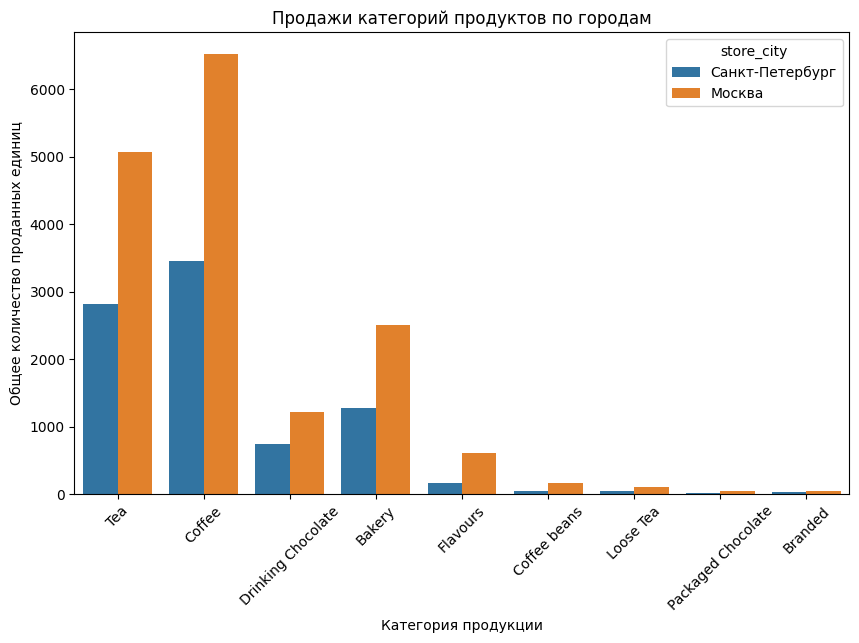

In [ ]:
WD1 = pd.crosstab(dt['product_category'], dt['store_city'], normalize='index'); WD1


plt.figure(figsize=(10,6))
sns.countplot(x='product_category', hue='store_city', data=dt)
plt.title('Продажи категорий продуктов по городам')
plt.xlabel('Категория продукции')
plt.ylabel('Общее количество проданных единиц')
plt.xticks(rotation=45)
plt.show()

**Вывод:** Так как количество продаж в г. Москве больше практически в два раза, можем отметить что распределение продаж по категориям продукции сохраняется.

# **Выводы**

**1. Территориальное распредение продаж по сети кофеен**

Большее количество продаж в г. Москве, так как тут расположено две торговые точки.


**2. Продажи по категориям продукции**

Наибольшее количество проданных единиц относится к категориям **Кофе**, **Чай**, **Выпечка**.
Анализ продаж по категориям продукции показывает, что кофе является наиболее продаваемым товаром, затем идёт чай и выпечка. Это указывает на важность наличия и расширения ассортимента кофе и чая для удовлетворения спроса покуптелей.

**3. Целевая аудитория кофеен**

Общая доля покупок составляет женщинами составляет 43.7%. Мужчинами 33.1%
Процентное распределение клиентов по полу показывает, что большинство клиентов - это женщины, за которыми следуют мужчины.
Боксплоты по возрасту в разрезе пола показывают, что межквартильный размах для женщин охватывает возраст от 35 до 61 лет, а для мужчин - от 37 до 63 лет. Медианный возраст для женщин составляет 48 лет, для мужчин - 50 лет.
Значительная часть клиентов не указала свой пол 23.2%, что является досточно значимой величиной, что может снизить качество анализа.

**4. Взаимосвязь продаж с полом и возрастом**

Женщины совершают наибольший объем покупок. Так можно заметить, что клиенты в возрасте с 25 до 45 лет совершают большую часть покупок. В г. Москве средний покупатель моложе.


# **Рекомендации:**
**Локазация**
Открывать новые точки лучше в г. Москва, в местах с большой проходимостью с большей долей женской аудитории, так же ориентироваться на возратную группу от 25 - до 45 лет, т.к. это активная аудитория покупателей.

**По ассортименту**

*Кофе:* Основной продукт, генерирующий наибольший объем продаж. Рекомендуется расширить ассортимент кофе, включив в него новые сорта и напитки.
*Чай:* Вторая по популярности категория продукции. Увеличить разнообразие чаев, предложить сезонные и специальные предложения.
*Выпечка:* Третья по популярности категория. Ввести новые виды выпечки и десертов для привлечения большего числа клиентов.

**Сбор данных**
Для более точного анализа -рекомендуется более детальный сбор инфомации о клиентах, включая возраст, время посещения и предпочтения клиента.
Это поможет создать более персонализированные предложения и увеличить средний чек продажи.

**Маркетинговые стратегии:** Рекомендую, разработать раздельные стратегии, направленные на женщин, так как они вносят значительный вклад в общий объем продаж. Также учитывать возрастные предпочтения при разработке акций и предложений.